In [2]:
!pip install lxml
!pip install --upgrade beautifulsoup4
!pip install --version tushare==1.0.5

    100% |████████████████████████████████| 92kB 5.6MB/s eta 0:00:01
    100% |████████████████████████████████| 194kB 4.8MB/s eta 0:00:01
  Running setup.py bdist_wheel for tushare ... done
  Stored in directory: /gpfs/fs01/user/s206-67b383ca00dcf3-efce55bf60d1/.cache/pip/wheels/78/e4/5a/96c01a01c037b281a7c3bb27a6de2254fd77201e64368d0c72
Successfully built tushare


In [22]:
import tushare as ts

print(ts.__version__)

1.0.5


In [23]:
import pandas as pd
import numpy as np
import statsmodels.api as sm #统计运算
import scipy.stats as scs #科学计算
import matplotlib.pyplot as plt #绘图
%matplotlib inline
from IPython.core.pylabtools import figsize

### 读入数据展现走势

In [29]:
his_haier = ts.get_hist_data('600690',start='2015-01-01')
his_icbc = ts.get_hist_data('601398',start='2015-01-01')

In [24]:
his_5liang = ts.get_hist_data('000858',start='2015-01-01')
his_hs300 = ts.get_hist_data('hs300',start='2015-01-01')

In [41]:
df = his_hs300.filter(['close']).rename(columns={'close':'hs300'}).join(his_icbc.filter(['close']).rename(columns={'close':'icbc'}))

In [42]:
df = df.join(his_haier.filter(['close']).rename(columns={'close':'haier'}))

In [43]:
df = df.join(his_5liang.filter(['close']).rename(columns={'close':'5liang'}))

In [5]:
#df = pd.read_csv('../datasets/stock.csv', encoding="GBK")

In [72]:
df.head()

,hs300,icbc,haier,5liang
date,,,,
2017-12-04,4018.86,5.90,17.64,67.95
2017-12-01,3998.14,5.89,17.34,65.30
2017-11-30,4006.10,5.91,17.29,65.60
2017-11-29,4053.75,5.93,17.57,66.22
2017-11-28,4055.82,5.92,18.36,68.68


In [46]:
# yyyy-m-d format must be set 'infer_datetime_format' true
#df[u'日期'] = pd.to_datetime(pd.Series(df[u'日期']), format=u"%Y-%m-%d",infer_datetime_format=True)
#data=df.sort_values(by=u'日期')

In [73]:
data = df

In [79]:
#pd.to_datetime(data.index, format='%Y-%m-%d', infer_datetime_format=True)

In [75]:
data.index = pd.to_datetime(data.index, format='%Y-%m-%d', infer_datetime_format=True)

In [8]:
#data[u'青岛海尔'] = data[u'青岛海尔'].astype(float)
#data[u'工商银行'] = data[u'工商银行'].astype(float)
#data[u'五 粮 液'] = data[u'五 粮 液'].astype(float)
#data[u'沪深300'] = data[u'沪深300'].astype(float)

In [9]:
#data = data.set_index(u'日期')

In [80]:
data = data.sort_index()

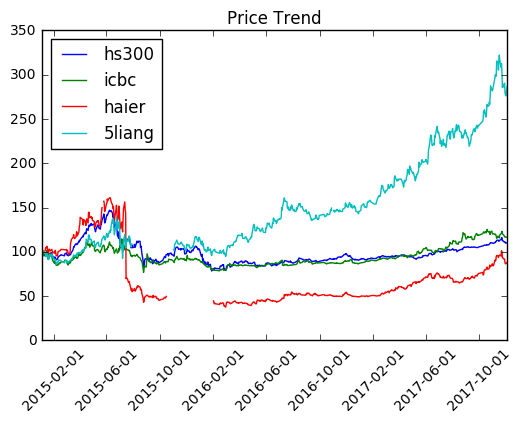

In [81]:
from matplotlib.font_manager import FontProperties
from matplotlib.dates import DateFormatter
#myfont = FontProperties(fname='../datasets/simsun.ttc', size=14) 

plt.plot(data.index, data/data.ix[0]*100)
ax = plt.subplot(111)
leg = plt.legend(data.columns, loc="upper left")
#leg.get_title().set_fontproperties(myfont)
#pd.Series(list(leg.get_texts())).apply(lambda t: t.set_fontproperties(myfont))

#plt.title(u'股票走势图', fontproperties=myfont)
plt.title('Price Trend')
ax.axes.set_xticklabels(data.index, rotation=45, size=10)
ax.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d"))
plt.show()

### 计算收益率标准差

In [82]:
log_return = np.log(data) - np.log(data.shift(1))

In [88]:
log_return

,hs300,icbc,haier,5liang
date,,,,
2015-01-05,NaN,NaN,NaN,NaN
2015-01-06,-0.000132,0.007874,0.017849,0.004640
2015-01-07,0.000750,-0.011834,-0.017349,-0.011854
2015-01-08,-0.023472,-0.042560,-0.008032,0.018984
2015-01-09,-0.003528,0.010299,-0.012171,-0.008814
2015-01-12,-0.009390,-0.012371,0.040005,-0.029087
2015-01-13,0.000132,0.000000,0.027558,-0.003043
2015-01-14,-0.003311,0.014418,-0.000954,-0.028258
2015-01-15,0.028623,0.040086,0.001431,0.023458


In [89]:
log_return = log_return.dropna()

In [90]:
mycov = log_return.cov()
myvar = log_return.var()
mybeta = mycov/myvar

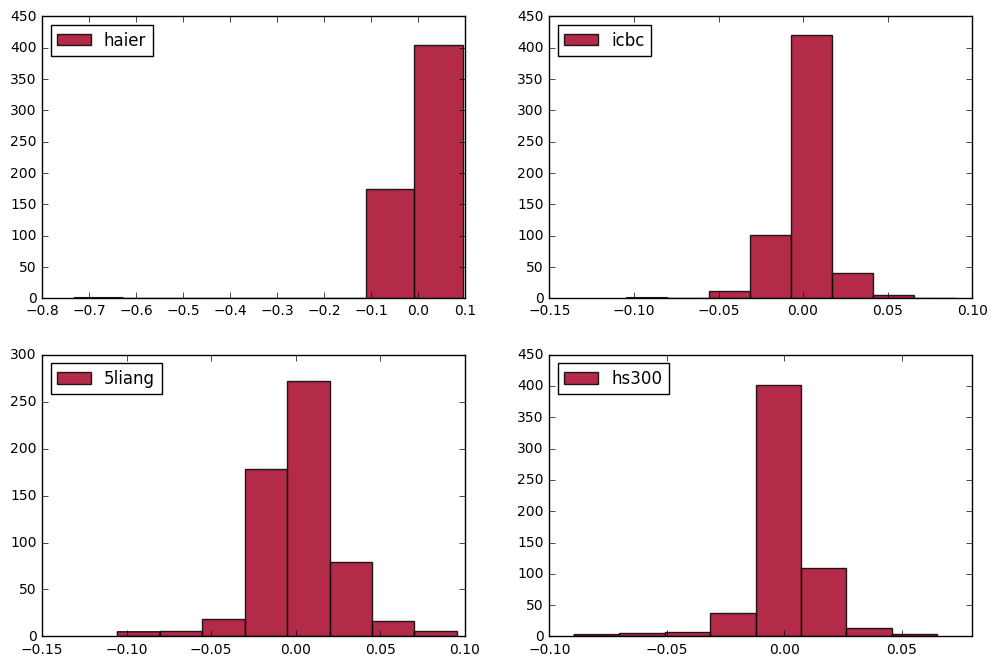

In [91]:
figsize(12, 8)

ax = plt.subplot(221)
plt.hist(log_return[u'haier'], bins=8, alpha=0.85,
        label=u"haier", color="#A60628")
#plt.hist(log_return, bins = 10, figsize = (9,6))
leg = plt.legend(loc="upper left")
#pd.Series(list(leg.get_texts())).apply(lambda t: t.set_fontproperties(myfont))

ax = plt.subplot(222)
plt.hist(log_return[u'icbc'], bins=8, alpha=0.85,
        label=u"icbc", color="#A60628")
#plt.hist(log_return, bins = 10, figsize = (9,6))
leg = plt.legend(loc="upper left")
#pd.Series(list(leg.get_texts())).apply(lambda t: t.set_fontproperties(myfont))

ax = plt.subplot(223)
plt.hist(log_return[u'5liang'], bins=8, alpha=0.85,
        label=u"5liang", color="#A60628")
#plt.hist(log_return, bins = 10, figsize = (9,6))
leg = plt.legend(loc="upper left")
#pd.Series(list(leg.get_texts())).apply(lambda t: t.set_fontproperties(myfont))

ax = plt.subplot(224)
plt.hist(log_return[u'hs300'], bins=8, alpha=0.85,
        label=u"hs300", color="#A60628")
#plt.hist(log_return, bins = 10, figsize = (9,6))
leg = plt.legend(loc="upper left")
#pd.Series(list(leg.get_texts())).apply(lambda t: t.set_fontproperties(myfont))


### 进行组合优化

使用CPLEX解决

In [92]:
returns = log_return[[u'haier',u'icbc',u'5liang']]

In [93]:
returns.columns = [u'Hair',u'ICBC',u'ALC']
sec = [u'Hair',u'ICBC',u'ALC']

In [96]:
# The code was removed by DSX for sharing.

In [99]:
import sys
try:
    import docplex.mp
except:
    if hasattr(sys, 'real_prefix'):
        #we are in a virtual env.
        !pip install docplex
    else:
        !pip install --user docplex

    100% |████████████████████████████████| 430kB 2.5MB/s eta 0:00:01
  Running setup.py bdist_wheel for docplex ... done
  Stored in directory: /gpfs/fs01/user/s206-67b383ca00dcf3-efce55bf60d1/.cache/pip/wheels/0c/a1/d4/3b847237e398f6f088d81a4980cb6de8e4ca1a6b368eb37091
  Running setup.py bdist_wheel for docloud ... done
  Stored in directory: /gpfs/fs01/user/s206-67b383ca00dcf3-efce55bf60d1/.cache/pip/wheels/44/6a/64/6dd62d3d93b8d07d1bb79f054e8d28b38930f6fb5deb2f28dd
Successfully built docplex docloud


In [100]:
from docplex.mp.advmodel import AdvModel as Model

In [102]:
df_s = pd.DataFrame(columns=['stock', 'return'])
df_s['stock'] = [u'Hair',u'ICBC',u'ALC']
df_s['return'] = log_return[[u'haier',u'icbc',u'5liang']].mean().values

In [103]:
df_s.set_index(['stock'], inplace=True)

In [104]:
dfv = pd.DataFrame(np.cov(np.asmatrix(returns).transpose()), index = sec, columns=sec)

In [105]:
dfv

,Hair,ICBC,ALC
Hair,0.001489,0.000136,0.000297
ICBC,0.000136,0.000222,0.000098
ALC,0.000297,0.000098,0.000576


In [106]:
def init_model(df_secs, target):
    sec = df_secs.index
    mdl = Model(name='portfolio_miqp')
    df_secs['frac'] = mdl.continuous_var_list(sec, name='frac', ub=1)
    # max fraction
    # every stock fraction must great than 0
    frac_max = 0.9
    for row in df_secs.itertuples():
        mdl.add_constraint(row.frac <= frac_max)
        mdl.add_constraint(row.frac >= 0.0)

    # sum of fractions equal 100%
    mdl.add_constraint(mdl.sum(df_secs.frac) == 1);
    # north america constraint:
    #    - add a 1-0 column equal to 1 
    # compute the scalar product of frac variables and the 1-0 'is_na' column and set a minimum
    # mdl.add_constraint(mdl.dot(df_secs.frac, df_secs.is_na) >= .4);

    # again we use scalar product to compute compound return rate
    # keep the expression to use as a kpi.
    actual_return = mdl.dot(df_secs.frac, df_secs['return'])
    mdl.add_kpi(actual_return, 'ROI')

    # KPIs
    fracs = df_secs.frac
    variance = mdl.sum(float(dfv[sec1][sec2]) * fracs[sec1] * fracs[sec2] for sec1 in sec for sec2 in sec)
    mdl.add_kpi(variance, 'Variance')

    # finally the objective
    mdl.minimize(variance)
    target_return = target # return data is expressed in percents
    # keep the constraint for later use (more on this later)
    ct_return = mdl.add_constraint(actual_return >= target_return);
    return mdl, ct_return, variance

In [107]:
def calcu_portfolio(mdl, target):
    # ensure minimal return on investment
    target_return = target # return data is expressed in percents
    # keep the constraint for later use (more on this later)
    ct_return = mdl.add_constraint(actual_return >= target_return);
    assert mdl.solve(), "Solve failed"
    mdl.report()
    all_fracs = {}
    for row in df_secs.itertuples():
        pct = 100 * row.frac.solution_value
        all_fracs[row[0]] = pct
        print('-- fraction allocated in: {0:<12}: {1:.2f}%'.format(row[0], pct))
    return all_fracs

In [108]:
df_s

,return
stock,
Hair,0.000198
ICBC,0.000559
ALC,0.001858


In [111]:
max_r = np.max(df_s['return'])
min_r = np.min(df_s['return'])
interval = (max_r - min_r) / 25.0
variances = []
mdl, ct_s, var = init_model(df_s, (min_r+max_r)/2.0)
target_r = []
for i in range(1, 24):
    target = i*interval + min_r;
#    print target
    target_r.append(target)
    ct_s.rhs = target
    cur_s = mdl.solve(url=SVC_URL, key=SVC_KEY)
    assert cur_s  # solve is OK
    cur_variance = var.solution_value
#    print('- for a target return of: {0}%, variance={1}'.format(target, cur_variance))
    variances.append(cur_variance**0.5)

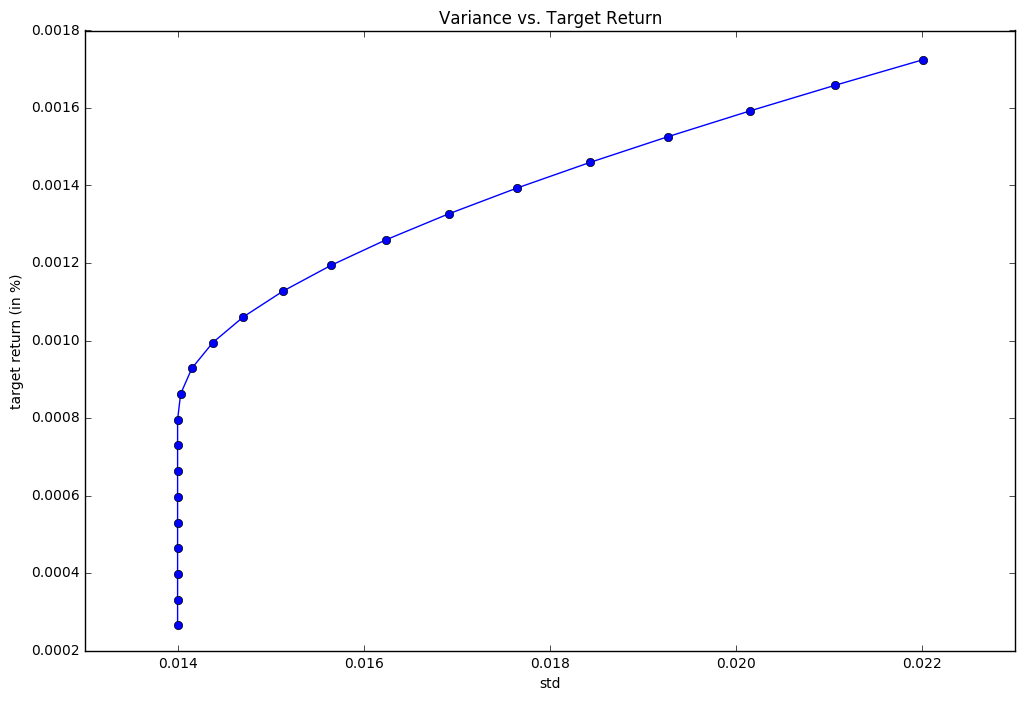

In [112]:


plt.plot( variances, target_r, 'bo-')
plt.title('Variance vs. Target Return')
plt.ylabel('target return (in %)')
plt.xlabel('std')
plt.show()



In [116]:
ct_s.rhs = 0.0016
cur_s = mdl.solve(url=SVC_URL, key=SVC_KEY)
assert cur_s  # solve is OK
cur_variance = var.solution_value
mdl.report()
all_fracs = {}
for row in df_s.itertuples():
    pct = 100 * row.frac.solution_value
    all_fracs[row[0]] = pct
    print('-- fraction allocated in: {0:<12}: {1:.2f}%'.format(row[0], pct))


* model portfolio_miqp solved with objective = 0.000
*  KPI: ROI      = 0.002
*  KPI: Variance = 0.000
-- fraction allocated in: Hair        : 0.00%
-- fraction allocated in: ICBC        : 19.84%
-- fraction allocated in: ALC         : 80.16%


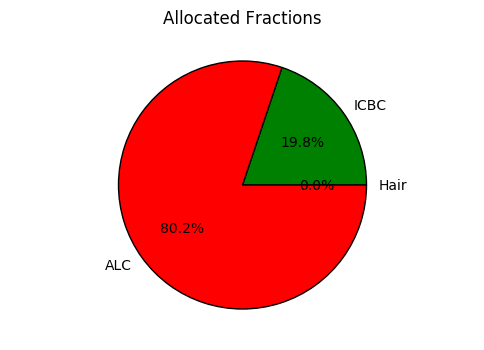

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt

def display_pie(pie_values, pie_labels, colors=None,title=''):
    plt.axis("equal")
    plt.pie(pie_values, labels=pie_labels, colors=colors, autopct="%1.1f%%")
    plt.title(title)
    plt.show()

display_pie( [t for t in all_fracs.values()], all_fracs.keys(),title='Allocated Fractions')